<a href="https://colab.research.google.com/github/khizon/NBA_points/blob/main/Visualizing_shots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install --upgrade --force-reinstall plotly --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 56.3 MB/s eta 0:00:00


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px
import copy

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/lebron_shots.csv',index_col=0)
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'], format = '%Y%m%d')
df.head()

GRID_TYPE   GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0  Shot Chart Detail  20300014             20       2544  LeBron James   
1  Shot Chart Detail  20300014             28       2544  LeBron James   
2  Shot Chart Detail  20300014             35       2544  LeBron James   
3  Shot Chart Detail  20300014             54       2544  LeBron James   
4  Shot Chart Detail  20300014             67       2544  LeBron James   

      TEAM_ID            TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0  1610612739  Cleveland Cavaliers       1                  8   
1  1610612739  Cleveland Cavaliers       1                  7   
2  1610612739  Cleveland Cavaliers       1                  7   
3  1610612739  Cleveland Cavaliers       1                  4   
4  1610612739  Cleveland Cavaliers       1                  3   

   SECONDS_REMAINING  ...  SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X LOC_Y  \
0                 56  ...         8-16 ft.            15   158     0   
1                 44  ...         8-16 ft.            13  -131     2   
2                  1  ...        16-24 ft.            16   163     5   
3                 48  ...  Less Than 8 ft.             5    54    22   
4                  3  ...  Less Than 8 ft.             0     0     0   

  SHOT_ATTEMPTED_FLAG SHOT_MADE_FLAG  GAME_DATE  HTM  VTM   SEASON  
0                   1              1 2003-10-29  SAC  CLE  2003-04  
1                   1              1 2003-10-29  SAC  CLE  2003-04  
2                   1              1 2003-10-29  SAC  CLE  2003-04  
3                   1              1 2003-10-29  SAC  CLE  2003-04  
4                   1              1 2003-10-29  SAC  CLE  2003-04  

[5 rows x 25 columns]

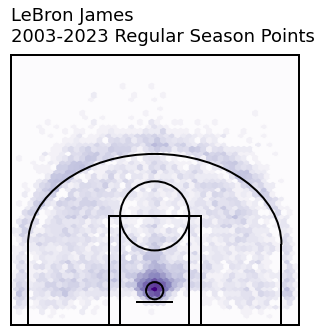

In [3]:
# Function to draw basketball court
def create_court(ax, color):
  # Short corner 3PT lines
  ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
  ax.plot([220, 220], [0, 140], linewidth=2, color=color)
  # 3PT Arc
  ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
  # Lane and Key
  ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
  ax.plot([80, 80], [0, 190], linewidth=2, color=color)
  ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
  ax.plot([60, 60], [0, 190], linewidth=2, color=color)
  ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
  ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
  # Rim
  ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
  # Backboard
  ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
  # Remove ticks
  ax.set_xticks([])
  ax.set_yticks([])  
  # Set axis limits
  ax.set_xlim(-250, 250)
  ax.set_ylim(0, 470)

  return ax
# General plot parameters
# mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
# Plot hexbin of shots
ax.hexbin(df['LOC_X'], df['LOC_Y'] + 60, gridsize=(60, 60), extent=(-300, 300, 0, 940), bins='log', cmap='Purples')
ax.text(0, 1.05, 'LeBron James\n2003-2023 Regular Season Points', transform=ax.transAxes, ha='left', va='baseline')
plt.show()

In [4]:
df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'SEASON'],
      dtype='object')

## Plotly

In [5]:
def draw_plotly_court(fig, fig_width=600, margins=10):

    import numpy as np
        
    # From: https://community.plot.ly/t/arc-shape-with-path/7205/5
    def ellipse_arc(x_center=0.0, y_center=0.0, a=10.5, b=10.5, start_angle=0.0, end_angle=2 * np.pi, N=200, closed=False):
        t = np.linspace(start_angle, end_angle, N)
        x = x_center + a * np.cos(t)
        y = y_center + b * np.sin(t)
        path = f'M {x[0]}, {y[0]}'
        for k in range(1, len(t)):
            path += f'L{x[k]}, {y[k]}'
        if closed:
            path += ' Z'
        return path

    fig_height = fig_width * (470 + 2 * margins) / (500 + 2 * margins)
    fig.update_layout(width=fig_width, height=fig_height)

    # Set axes ranges
    fig.update_xaxes(range=[-250 - margins, 250 + margins])
    fig.update_yaxes(range=[-52.5 - margins, 417.5 + margins])

    threept_break_y = 89.47765084
    three_line_col = "#777777"
    main_line_col = "#777777"

    fig.update_layout(
        # Line Horizontal
        margin=dict(l=20, r=20, t=20, b=20),
        paper_bgcolor="white",
        plot_bgcolor="white",
        yaxis=dict(
            scaleanchor="x",
            scaleratio=1,
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            showticklabels=False,
            fixedrange=True,
        ),
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            showline=False,
            ticks='',
            showticklabels=False,
            fixedrange=True,
        ),
        shapes=[
            dict(
                type="rect", x0=-250, y0=-52.5, x1=250, y1=417.5,
                line=dict(color=main_line_col, width=1),
                # fillcolor='#333333',
                layer='below'
            ),
            dict(
                type="rect", x0=-80, y0=-52.5, x1=80, y1=137.5,
                line=dict(color=main_line_col, width=1),
                # fillcolor='#333333',
                layer='below'
            ),
            dict(
                type="rect", x0=-60, y0=-52.5, x1=60, y1=137.5,
                line=dict(color=main_line_col, width=1),
                # fillcolor='#333333',
                layer='below'
            ),
            dict(
                type="circle", x0=-60, y0=77.5, x1=60, y1=197.5, xref="x", yref="y",
                line=dict(color=main_line_col, width=1),
                # fillcolor='#dddddd',
                layer='below'
            ),
            dict(
                type="line", x0=-60, y0=137.5, x1=60, y1=137.5,
                line=dict(color=main_line_col, width=1),
                layer='below'
            ),

            dict(
                type="rect", x0=-2, y0=-7.25, x1=2, y1=-12.5,
                line=dict(color="#ec7607", width=1),
                fillcolor='#ec7607',
            ),
            dict(
                type="circle", x0=-7.5, y0=-7.5, x1=7.5, y1=7.5, xref="x", yref="y",
                line=dict(color="#ec7607", width=1),
            ),
            dict(
                type="line", x0=-30, y0=-12.5, x1=30, y1=-12.5,
                line=dict(color="#ec7607", width=1),
            ),

            dict(type="path",
                 path=ellipse_arc(a=40, b=40, start_angle=0, end_angle=np.pi),
                 line=dict(color=main_line_col, width=1), layer='below'),
            dict(type="path",
                 path=ellipse_arc(a=237.5, b=237.5, start_angle=0.386283101, end_angle=np.pi - 0.386283101),
                 line=dict(color=main_line_col, width=1), layer='below'),
            dict(
                type="line", x0=-220, y0=-52.5, x1=-220, y1=threept_break_y,
                line=dict(color=three_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=-220, y0=-52.5, x1=-220, y1=threept_break_y,
                line=dict(color=three_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=220, y0=-52.5, x1=220, y1=threept_break_y,
                line=dict(color=three_line_col, width=1), layer='below'
            ),

            dict(
                type="line", x0=-250, y0=227.5, x1=-220, y1=227.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=250, y0=227.5, x1=220, y1=227.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=-90, y0=17.5, x1=-80, y1=17.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=-90, y0=27.5, x1=-80, y1=27.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=-90, y0=57.5, x1=-80, y1=57.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=-90, y0=87.5, x1=-80, y1=87.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=90, y0=17.5, x1=80, y1=17.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=90, y0=27.5, x1=80, y1=27.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=90, y0=57.5, x1=80, y1=57.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),
            dict(
                type="line", x0=90, y0=87.5, x1=80, y1=87.5,
                line=dict(color=main_line_col, width=1), layer='below'
            ),

            dict(type="path",
                 path=ellipse_arc(y_center=417.5, a=60, b=60, start_angle=-0, end_angle=-np.pi),
                 line=dict(color=main_line_col, width=1), layer='below'),

        ]
    )
    return True

In [6]:
df['DATE_STR'] = df['GAME_DATE'].dt.strftime('%m/%d/%Y')
df['SEASON'].unique()

array(['2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15',
       '2015-16', '2016-17', '2017-18', '2018-19', '2019-20', '2020-21',
       '2021-22', '2022-23'], dtype=object)

In [7]:
cdf = copy.deepcopy(df)

In [8]:
for season in df['SEASON'].unique():
  temp_df = copy.deepcopy(df[df['SEASON']<season])
  temp_df['SEASON']=season
  cdf=cdf.append(temp_df)

In [28]:
fig=px.scatter(
        cdf, x='LOC_X', y='LOC_Y', animation_frame='SEASON',
        opacity=0.1,
        hover_name='DATE_STR',
        labels={'LOC_X':'', 'LOC_Y':''},
        hover_data={'LOC_X': False, 'LOC_Y': False,
                    'SEASON':False, 'DATE_STR': False,
                    },
        title= 'Lebron James - Regular Season Points',
    )
draw_plotly_court(fig)
fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.update_layout(
    title_y = 0.2,
    title_x = 0.5
)
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0
fig.show()

In [10]:
fig.layout.updatemenus[0].buttons[0].args[1]

{'frame': {'duration': 500, 'redraw': False},
 'mode': 'immediate',
 'fromcurrent': True,
 'transition': {'duration': 0, 'easing': 'linear'}}

In [11]:
PATH = '/content/drive/MyDrive/Colab_Notebooks'
fig.write_html(f'{PATH}/lebron.html')